In [10]:
from pathlib import Path
from keras import models, preprocessing
import numpy as np
from tensorflow.python.client import device_lib

In [11]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1188728567594906122, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 1470421401
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11933638829546973355
 physical_device_desc: "device: 0, name: GeForce 840M, pci bus id: 0000:07:00.0, compute capability: 5.0"]

In [12]:
cifar_10_labels = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Boat",
    9: "Truck"
}

Load structure and weights of trained model.

In [13]:
f = Path("model_structure.json")
model_structure = f.read_text()

In [14]:
model = models.model_from_json(model_structure)
model.load_weights("model_weight.h5")

Load image for testing model prediction.

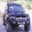

In [26]:
img = preprocessing.image.load_img('./for_test/car.png', target_size=(32,32))
img

In [27]:
image_to_test = preprocessing.image.img_to_array(img)

As keras takes batches of examples, we will make a trick to add one more dimension to our 3d array which will be equal to 1.

In [28]:
list_images = np.expand_dims(image_to_test, axis=0)

In [29]:
results = model.predict_proba(list_images)

In [30]:
result = results[0]

Choose prediction by selecting maximal output signal.

In [36]:
class_index = np.argmax(result)
print ('Prediction is {} - Probability: {}'.format(cifar_10_labels[class_index], result[class_index]))

Prediction is Car - Probability: 1.0
